 # **PREDICTING BLACK FRIDAY SALES**

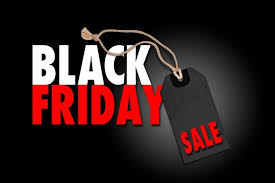

Black Friday is an informal name for the Friday following Thanksgiving Day in the United States, which is celebrated on the fourth Thursday of November. The day after Thanksgiving has been regarded as the beginning of the United States Christmas shopping season since 1952, although the term "Black Friday" did not become widely used until more recent decades.

Many stores offer highly promoted sales on Black Friday and open very early, such as at midnight, or may even start their sales at some time on Thanksgiving. Black Friday has routinely been the busiest shopping day of the year in the United States since 2005, although news reports, which at that time were inaccurate, have described it as the busiest shopping day of the year for a much longer period of time. Similar stories resurface year upon year at this time, portraying hysteria and shortage of stock, creating a state of positive feedback.
*Source: Wikipedia*

# **Import Relevant Libraries and modules**

In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics

# **Load and Inspect Dataset**

In [ ]:
train = pd.read_csv('/content/drive/My Drive/Black Friday Predictions/train.csv')

In [ ]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


# **Exploratory Data Analysis**

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [ ]:
train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [ ]:
#Dealing with Null values

train.fillna(value=0, inplace=True)

In [ ]:
#Converting Categories into Object datatypes for Proper Analysis

train['Occupation'] = train['Occupation'].astype(object)
train['Marital_Status'] = train['Marital_Status'].astype(object)
train['Product_Category_1'] = train['Product_Category_1'].astype(object)
train['Product_Category_2'] = train['Product_Category_2'].astype(object)
train['Product_Category_3'] = train['Product_Category_3'].astype(object)

In [ ]:
train.describe(include='object').T

,count,unique,top,freq
Product_ID,550068,3631,P00265242,1880
Gender,550068,2,M,414259
Age,550068,7,26-35,219587
Occupation,550068,21,4,72308
City_Category,550068,3,B,231173
Stay_In_Current_City_Years,550068,5,1,193821
Marital_Status,550068,2,0,324731
Product_Category_1,550068,20,5,150933
Product_Category_2,550068,18,0,173638
Product_Category_3,550068,16,0,383247


In [ ]:
def count_values():
  for column in train.select_dtypes(include='object').columns:
    count  = train[column].value_counts(ascending = False)
    print(column)
    print(count)
    print('\n')

In [ ]:
count_values()

Product_ID
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00329042       1
P00104042       1
P00164242       1
P00314742       1
P00206942       1
Name: Product_ID, Length: 3631, dtype: int64


Gender
M    414259
F    135809
Name: Gender, dtype: int64


Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64


Occupation
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64


City_Category
B    231173
C    171175
A    147720
Name: City_Category, dtype: int64


Stay_In_Current_City_Years
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64


Marital_Status
0   

In [ ]:
# Checking Relationship between Gender and Purchase

train.groupby('Gender')['Purchase'].median()

Gender
F    7914
M    8098
Name: Purchase, dtype: int64

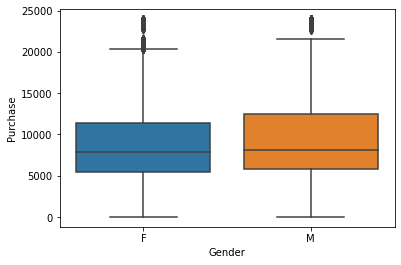

In [ ]:
sns.boxplot(x= 'Gender', y = 'Purchase', data = train)

In [ ]:
# Checking Relationship between Age and Purchase

train.groupby('Age')['Purchase'].median()

Age
0-17     7986.0
18-25    8027.0
26-35    8030.0
36-45    8061.0
46-50    8036.0
51-55    8130.0
55+      8105.5
Name: Purchase, dtype: float64

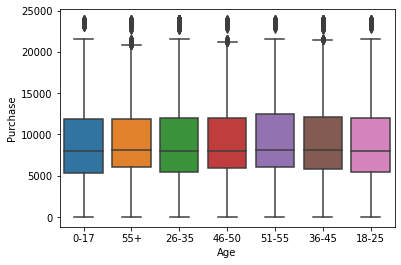

In [ ]:
sns.boxplot(x= 'Age', y = 'Purchase', data = train)

In [ ]:
# Checking Relationship between Occupation and Purchase

train.groupby('Occupation')['Purchase'].median()

Occupation
0     8001.0
1     7966.0
2     7952.0
3     8008.0
4     8043.0
5     8080.0
6     8050.0
7     8069.0
8     8419.5
9     7886.0
10    8012.5
11    8041.5
12    8569.0
13    8090.5
14    8122.0
15    8513.0
16    8070.0
17    8635.0
18    7955.0
19    7840.0
20    7903.5
Name: Purchase, dtype: float64

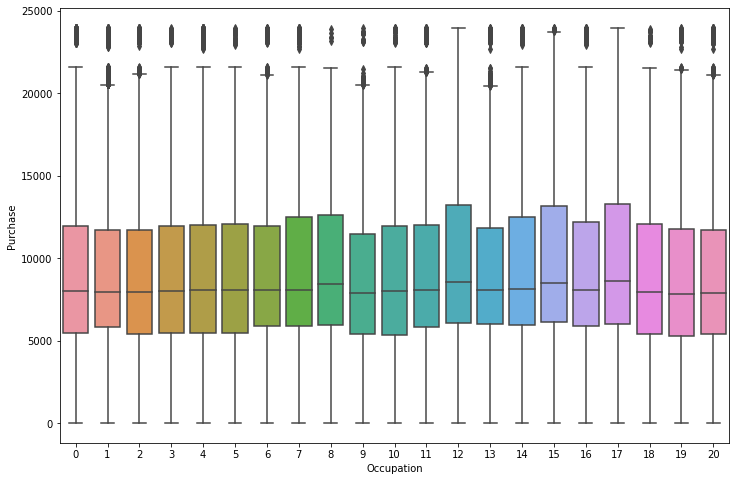

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(x= 'Occupation', y = 'Purchase', data = train)

In [ ]:
# Checking relationship between City Category and Purchase

train.groupby('City_Category')['Purchase'].median()

City_Category
A    7931
B    8005
C    8585
Name: Purchase, dtype: int64

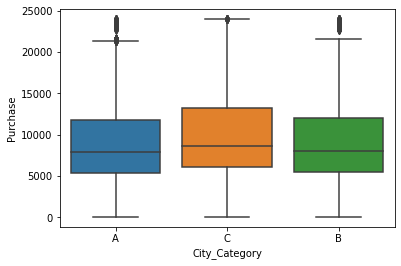

In [ ]:
sns.boxplot(x= 'City_Category', y = 'Purchase', data = train)

In [ ]:
# Checking Relationship between Stay_In_Current_City_Years and Purchase

train.groupby('Stay_In_Current_City_Years')['Purchase'].median()

Stay_In_Current_City_Years
0     8025
1     8041
2     8072
3     8047
4+    8052
Name: Purchase, dtype: int64

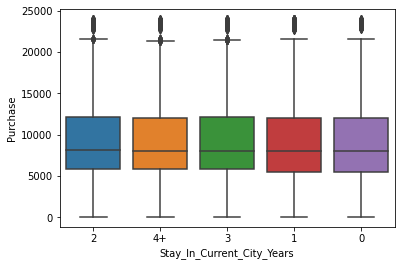

In [ ]:
sns.boxplot(x= 'Stay_In_Current_City_Years', y = 'Purchase', data = train)

In [ ]:
# Checking Relationship between Marital_Status and Purchase

train.groupby('Marital_Status')['Purchase'].median()

Marital_Status
0    8044
1    8051
Name: Purchase, dtype: int64

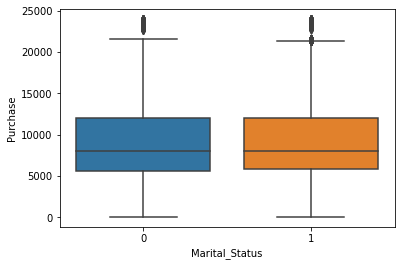

In [ ]:
sns.boxplot(x= 'Marital_Status', y = 'Purchase', data = train)

In [ ]:
# Checking Relationship between Product_Category_1 and Purchase

train.groupby('Product_Category_1')['Purchase'].median()

Product_Category_1
1     15245.0
2     12728.5
3     10742.0
4      2175.0
5      6912.0
6     16312.0
7     16700.0
8      7905.0
9     14388.5
10    19197.0
11     4611.0
12     1401.0
13      755.0
14    14654.0
15    16660.0
16    16292.5
17    10435.5
18     3071.0
19       37.0
20      368.0
Name: Purchase, dtype: float64

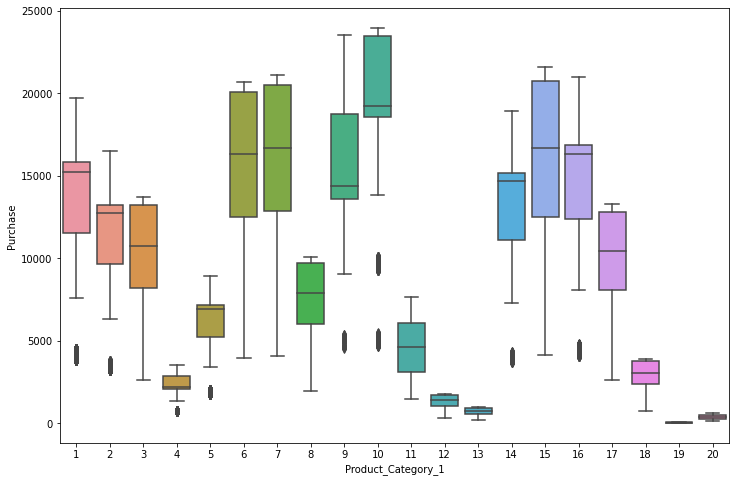

In [ ]:
fig, ax = plt.subplots(figsize = (12,8))
sns.boxplot(x= 'Product_Category_1', y = 'Purchase', data = train)

In [ ]:
# Checking Relationship between Product_Category_2 and Purchase

train.groupby('Product_Category_2')['Purchase'].median()

Product_Category_2
0.0      7075.0
2.0     15241.0
3.0     12714.5
4.0     10681.0
5.0      9892.0
6.0     11611.0
7.0      7058.0
8.0      8675.0
9.0      6955.0
10.0    16341.0
11.0     7180.0
12.0     7021.0
13.0     7981.0
14.0     7026.0
15.0     8857.0
16.0     9832.0
17.0     8314.5
18.0     7991.0
Name: Purchase, dtype: float64

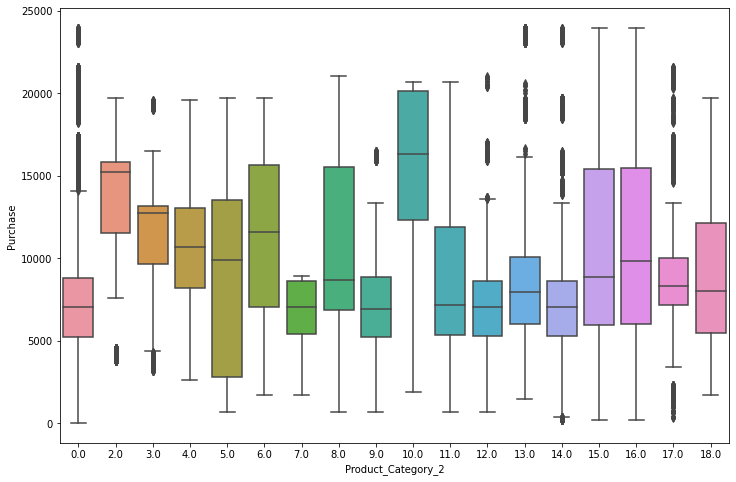

In [ ]:
fig, ax = plt.subplots(figsize = (12,8))
sns.boxplot(x= 'Product_Category_2', y = 'Purchase', data = train)

In [ ]:
# Checking Relationship between Product_Category_3 and Purchase

train.groupby('Product_Category_3')['Purchase'].median()

Product_Category_3
0.0      7449.0
3.0     15288.0
4.0      9850.0
5.0     11767.5
6.0     15174.5
8.0     15204.0
9.0     11390.0
10.0    13051.0
11.0    11912.0
12.0     8370.0
13.0    12612.0
14.0     8653.0
15.0    12011.0
16.0    11916.0
17.0    11431.5
18.0    11589.0
Name: Purchase, dtype: float64

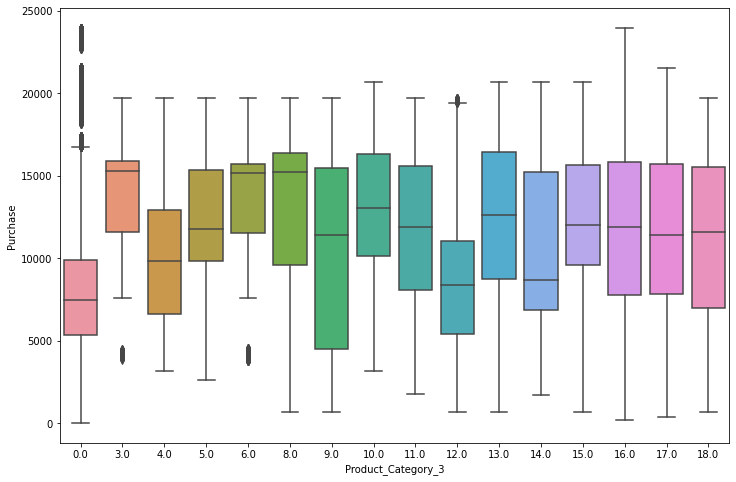

In [ ]:
fig, ax = plt.subplots(figsize = (12,8))
sns.boxplot(x= 'Product_Category_3', y = 'Purchase', data = train)

# **Feature Selection & Data Preprocessing**

After EDA, columns to use for Model building are:
[Occupation, City_Category, Product_Category_1, Product_Category_2, Product_Category_3]

In [109]:
selected_columns = ['Occupation', 'City_Category', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']
X = train[selected_columns]
y = train['Purchase']

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 20)

# **Model Building**

1. Linear Regression

In [111]:
lin_reg = Pipeline([('ohe', OneHotEncoder()),
                     ('lr', LinearRegression())])


lin_reg.fit(X_train, y_train)

lin_pred = lin_reg.predict(X_test)

print('The RMSE is: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, lin_pred))))
print('The Training score is: {:.2f}%'.format(lin_reg.score(X_train, y_train)* 100))
print('The Test score is: {:.2f}%'.format(lin_reg.score(X_test, y_test)*100))

The RMSE is: 2985.34
The Training score is: 64.77%
The Test score is: 64.65%


2. Decision Tree Regresssor

In [164]:
dec_tree =  Pipeline([('ohe', OneHotEncoder()),
                      ('dt', DecisionTreeRegressor())])

dec_tree.fit(X_train, y_train)

tree_pred = dec_tree.predict(X_test)

print('The RMSE is: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, tree_pred))))
print('The Training score is: {:.2f}%'.format(dec_tree.score(X_train, y_train)*100))
print('The Test score is: {:.2f}%'.format(dec_tree.score(X_test, y_test)*100))

The RMSE is: 2973.35
The Training score is: 67.61%
The Test score is: 64.94%


3. Random Forest Regressor

In [163]:
rand_for =  Pipeline([('ohe', OneHotEncoder()),
                      ('rf', RandomForestRegressor())])

rand_for.fit(X_train, y_train)

rand_pred = rand_for.predict(X_test)

print('The RMSE is: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, rand_pred))))
print('The Training score is: {:.2f}%'.format(rand_for.score(X_train, y_train)*100))
print('The Test score is: {:.2f}%'.format(rand_for.score(X_test, y_test)*100))

The RMSE is: 2965.42
The Training score is: 67.58%
The Test score is: 65.12%


4. Gradient Boosting Regressor

In [165]:
gradient =  Pipeline([('ohe', OneHotEncoder()),
                      ('gb', GradientBoostingRegressor())])

gradient.fit(X_train, y_train) 

grad_pred = gradient.predict(X_test)

print('The RMSE is: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, grad_pred))))
print('The Training score is: {:.2f}%'.format(gradient.score(X_train, y_train)*100))
print('The Test score is: {:.2f}%'.format(gradient.score(X_test, y_test)*100))

The RMSE is: 3014.22
The Training score is: 64.00%
The Test score is: 63.96%


5. AdaBoost Regressor

In [ ]:
adaboost = Pipeline([('ohe', OneHotEncoder()),
                     ('adab', AdaBoostRegressor())])


adaboost.fit(X_train, y_train)

adab_pred = adaboost.predict(X_test)

print('The RMSE is: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, adab_pred))))
print('The Training score is: {:.2f}%'.format(adaboost.score(X_train, y_train)* 100))
print('The Test score is: {:.2f}%'.format(adaboost.score(X_test, y_test)*100))

The RMSE is: 3776.68
The Training score is: 43.27%
The Test score is: 43.43%


Hyperparameter tuning with GridSearchCV

In [167]:
# GridSearchCV on the Decision Tree Regressor. Did not use Random Forest due to Computational cost

params = {'dt__min_samples_split': [300, 500, 700],
          'dt__min_samples_leaf': [50, 100, 200]}

dec_tree_cv = GridSearchCV(dec_tree, param_grid=params)

dec_tree_cv.fit(X_train, y_train)

print('The Best Hyperparameters:')
print(dec_tree_cv.best_params_, '\n')
print('The Best Score:')
print(dec_tree_cv.best_score_)

The Best Hyperparameters:
{'dt__min_samples_leaf': 100, 'dt__min_samples_split': 300} 

The Best Score:
0.6598066034933223


In [168]:
#Train with Best Hyperparameters

dec_tree_final =  Pipeline([('ohe', OneHotEncoder()),
                      ('dt', DecisionTreeRegressor(min_samples_split = 300, min_samples_leaf =100 ))])

dec_tree_final.fit(X_train, y_train) 

final_pred = dec_tree_final.predict(X_test)

print('The RMSE is: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, final_pred))))
print('The Training score is: {:.2f}%'.format(dec_tree_final.score(X_train, y_train)*100))
print('The Test score is: {:.2f}%'.format(dec_tree_final.score(X_test, y_test)*100))

The RMSE is: 2932.59
The Training score is: 66.35%
The Test score is: 65.89%


**The Best Model is the Decision Tree Regressor with min_samples_split = 300, min_samples_leaf = 100**

# **Loading Test Data and Running Predictions**

In [169]:
test = pd.read_csv('/content/drive/My Drive/Black Friday Predictions/test.csv')

In [171]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


In [170]:
id_columns = test[['User_ID', 'Product_ID']].copy()

In [172]:
test.fillna(value=0, inplace=True)

test['Occupation'] = test['Occupation'].astype(object)
test['Marital_Status'] = test['Marital_Status'].astype(object)
test['Product_Category_1'] = test['Product_Category_1'].astype(object)
test['Product_Category_2'] = test['Product_Category_2'].astype(object)
test['Product_Category_3'] = test['Product_Category_3'].astype(object)


In [173]:
cleanned_test = test[selected_columns].copy()

In [174]:
predictions = dec_tree_final.predict(cleanned_test)

In [175]:
df_predictions = pd.DataFrame(predictions, columns=['Purchase'])

In [176]:
df_predictions.head()

,Purchase
0,14302.072491
1,10831.183607
2,6132.663473
3,2146.563758
4,2645.381526


In [180]:
df_predictions['Purchase'] = df_predictions['Purchase'].round()

In [181]:
final_df = pd.concat([df_predictions, id_columns], axis = 1)

In [182]:
final_df.shape

(233599, 3)

In [183]:
final_df.to_csv('black_friday_predictions.csv', index=False)

In [184]:
from google.colab import files

In [185]:
files.download('black_friday_predictions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>